In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# importing custom modules..

import My_preprocessing_utils
import MyCustomException
import My_custom_models



In [3]:
df = pd.read_csv('D:\Machine-learning-from-scratch\Logistic-Regression\personality_datasert.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\affan\AppData\Local\Temp\ipykernel_6296\260150333.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\Machine-learning-from-scratch\Logistic-Regression\personality_datasert.csv')


In [4]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Data preprocessing

In [5]:
df.shape

(2900, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [7]:
df.duplicated().sum()

np.int64(402)

In [8]:
# dropping duplicated row

df.drop_duplicates(inplace=True)

In [9]:
df['Stage_fear']=df['Stage_fear'].map({'Yes':1 , 'No':0}).astype(np.int32)
df['Drained_after_socializing']=df['Drained_after_socializing'].map({'Yes':1,'No':0}).astype(np.int32)

In [10]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,Extrovert
1,9.0,1,0.0,0.0,1,0.0,3.0,Introvert
2,9.0,1,1.0,2.0,1,5.0,2.0,Introvert
3,0.0,0,6.0,7.0,0,14.0,8.0,Extrovert
4,3.0,0,9.0,4.0,0,8.0,5.0,Extrovert


### Data splitting

In [11]:
X = df.iloc[: , :-1]
y = df.iloc[:,[-1]]




In [12]:
# converting label -> int

from My_preprocessing_utils import My_Label_Encoder

encode =My_Label_Encoder()

y = encode.fit_transform(y)



In [13]:
# splitting data for traing and testing using custom train_test_split

from My_preprocessing_utils import My_custom_train_test_split

obj = My_custom_train_test_split(X,y,test_size=0.2,random_state=True)

X_train , X_test , y_train , y_test = obj.split()

In [14]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(499, 7)
(1999, 7)
(499,)
(1999,)


### Scaling

In [15]:
from My_preprocessing_utils import my_custom_standard_scaler

scaler = my_custom_standard_scaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [37]:
import importlib

importlib.reload(My_custom_models)

<module 'My_custom_models' from 'd:\\Machine-learning-from-scratch\\Logistic-Regression\\My_custom_models.py'>

In [29]:
from My_custom_models import My_custom_logisticRegression

model = My_custom_logisticRegression(lr=0.01,epochs=1000)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)


Epoch 0 | Loss: 0.6931
Epoch 100 | Loss: 0.3521
Epoch 200 | Loss: 0.3047
Epoch 300 | Loss: 0.2914
Epoch 400 | Loss: 0.2862
Epoch 500 | Loss: 0.2836
Epoch 600 | Loss: 0.2821
Epoch 700 | Loss: 0.2809
Epoch 800 | Loss: 0.2800
Epoch 900 | Loss: 0.2793
Epoch 999 | Loss: 0.2787


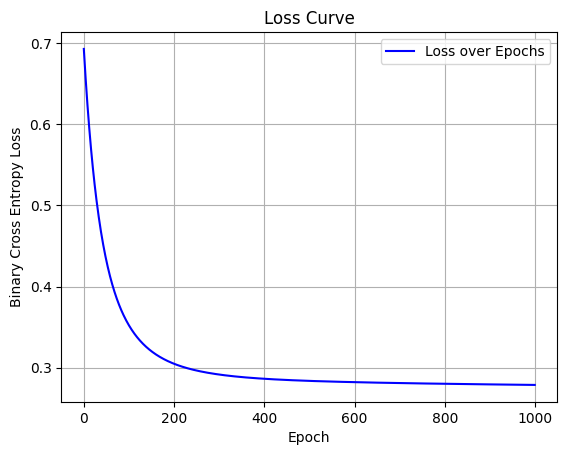

In [27]:
model.plot_loss()

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9078156312625251
